In [1]:
filepath = "F:/Jupyter/NLP/Artificial-Intelligence-NLP/Project1/sqlResult_1558435.csv"

In [2]:
import pandas as pd

In [120]:
content = pd.read_csv(filepath)

In [121]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\n至于...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\n@深圳交警微博称：昨日清晨交...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [122]:
from_xinhua = content[content['source'] =="新华社"]

In [123]:
from_xinhua.tail()

,id,author,source,content,feature,title,url
89606,5,邹峥,新华社,新华社照片，多伦多，2017年6月7日\n（体育）（2）冰球——国家女子冰球队海外选秀在多伦...,"{""type"":""冰球"",""site"":""新华社"",""url"":""http://home.x...",（体育）（2）冰球——国家女子冰球队海外选秀在多伦多展开,http://home.xinhua-news.com/gdsdetailxhsnew/22...
89607,4,王衡,新华社,新华社兰州6月3日电（王衡、徐丹）记者从甘肃省交通运输厅获悉，甘肃近日集中开建高速公路、普通...,"{""type"":""宏观经济"",""site"":""新华社"",""url"":""http://home...",（经济）甘肃集中开工35个重点交通建设项目,http://home.xinhua-news.com/gdsdetailxhsnew/22...
89608,3,张旌,新华社,\n\n2017年5月29日，在法国巴黎郊外的凡尔赛宫，法国总统马克龙出席新闻发布会。（新华...,"{""type"":""其它"",""site"":""新华社"",""url"":""http://home.x...",法国议会选举 马克龙有望获“压倒性胜利”,http://home.xinhua-news.com/gdsdetailxhsnew/22...
89609,2,夏文辉,新华社,\n\n2017年5月25日，在美国马萨诸塞州剑桥市，哈佛大学毕业生在毕业典礼上欢呼。（新华...,"{""type"":""其它"",""site"":""新华社"",""url"":""http://home.x...",哈佛大学为何取消这些新生入选资格？,http://home.xinhua-news.com/gdsdetailxhsnew/22...
89610,1,王子江 张寒,新华社,新华社德国杜塞尔多夫６月６日电题：乒乓女球迷 \n 新华社记者王子江、张寒\n 熊老...,"{""type"":""体育"",""site"":""新华社"",""url"":""http://home.x...",（体育）题：乒乓女球迷,http://home.xinhua-news.com/gdsdetailxhsnew/22...


In [7]:
data_xinhua = from_xinhua['content']

In [124]:
not_from_xinhua = content[content['source']!='新华社']

In [125]:
neg = not_from_xinhua['content']

In [127]:
len(data_xinhua)

78661

In [9]:
len(data_xinhua)/ len(content)

0.8778051801676133

In [126]:
len(neg)

10950

### 逻辑回归

#### 1. 处理数据集，记录标签，存储词向量
https://radimrehurek.com/gensim/models/doc2vec.html

In [4]:
import jieba
import re
import pandas as pd
import os
from gensim.models.doc2vec import Doc2Vec,TaggedDocument

In [5]:
def cut(str): return ' '.join(jieba.cut(str))

In [6]:
def token(str):
    str = str.replace("新华社","")
    str = str.replace("\\n","")
    return ''.join(re.findall(r'[\d|\w]+',str))

In [13]:
class dataLoading():
    news_content=None # 最后的原数据集，除掉nan
    news_source = None # 所有数据的标签
    news_label = None # 读入的数据集的标签
    model = None
    dataset =None
    
    def __init__(self,input_vector_size):
        self.loadingdata()
        self.loadingModel(input_vector_size)
    
    def loadingdata(self):
        print("加载源csv")
        filepath = "F:/Jupyter/NLP/Artificial-Intelligence-NLP/Project1/sqlResult_1558435.csv"
        content = pd.read_csv(filepath)
        self.news_source = content['source'].tolist()
        if not os.path.exists('news.txt'):
            news_content = content['content'].tolist()
            news_content = [token(str(i)) for i in news_content]
            self.news_content = [cut(i) for i in news_content]
            print("写入文件")
            with open('news.txt','w',encoding='gb18030') as f:
                for line in self.news_content:
                    f.write(line + '\n')
        self.loadContent()
        
    def loadingModel(self, input_vector_size):
        self.dataset = []
        if not os.path.exists('doc2vec-'+str(input_vector_size)+'.model'):
            self.saveModel(input_vector_size)
        else: self.model = Doc2Vec.load('doc2vec-'+str(input_vector_size)+'.model')
        size = len(self.news_label)
        for i in range(size):
            self.dataset.append(self.model.docvecs.vectors_docs[i])
        
    def loadContent(self):
        print("获得非空的数据集和标签")
        self.news_content = []
        self.news_label = []
        with open('news.txt',encoding='gb18030') as f:
            i = 0
            for line in f.readlines():
                if line.strip() == 'nan' :
                        i+=1
                        continue
                else:  
                    self.news_content.append(line[:-1])
                    if self.news_source[i] == '新华社':
                        self.news_label.append(1)
                    else: self.news_label.append(0)
                    i +=1
    def saveModel(self, vector_size):
        doc = [TaggedDocument(doc,[i]) for i ,doc in enumerate(self.news_content)]
        self.model = Doc2Vec(doc, vector_size=vector_size,window = 4, min_count = 5, workers = 8)
        print("保存模型")
        self.model.save('doc2vec-'+str(vector_size)+'.model')     

In [152]:
def testModel():
    print(model.docvecs.most_similar(0)) #与标签0最为相似的
    print(model.docvecs.similarity(0,1)) #进行相关性比较
    print(model.docvecs[10]) #标签10文章的向量
    print("\n")
    print(model.infer_vector(jieba.cut(token("法国巴黎郊外的凡尔赛宫")))) #判断一个句向量

In [15]:
model = data.model

In [19]:
dataset = data.dataset
news_label = data.news_label

In [179]:
len(dataset)

87054

### 2.预处理，归一化

In [20]:
from sklearn.cross_validation import train_test_split
import random

D:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
size = len(news_label)
for i in range(2000):
    num = random.randint(size)
    if news_label[num] == 1:
        del news_label[num]
        del dataset[num]
        size -=1

In [22]:
X_train, X_test, y_train,y_test = train_test_split(dataset, news_label, test_size=0.4,random_state =10)

In [229]:
len(X_test)

34822

In [25]:
len(X_train)

52232

### 先以原比例训练
  标准化特征值

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [27]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 评估

In [188]:
from sklearn.metrics import precision_recall_curve,average_precision_score,confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [371]:
# 对所有非新华社，新华社统一预测正确率
def test_all(clf ,lx = 1):
    neg = []
    pos = []
    for i in not_xinhua_id:
        neg.append(model.docvecs.vectors_docs[i])
    for i in xinhua_id:
        pos.append(model.docvecs.vectors_docs[i])
    neg_y = [0] * len(not_xinhua_id)
    pos_y = [1] * len(xinhua_id)
    if lx == 0:
        neg_std = mm.transform(neg)
        pos_std = mm.transform(pos)
    else:
        neg_std = sc.transform(neg)
        pos_std = sc.transform(pos)
    acc_neg = clf.score(neg_std,neg_y)
    acc_pos = clf.score(pos_std,pos_y)
    print("所有非新华社的正确率：{}， 所有新华社的正确率：{}".format(acc_neg, acc_pos))

In [142]:
def predict_test(clf,docid):
    prob = clf.predict(sc.transform([model.docvecs.vectors_docs[docid]])[:1,:])
    if prob.tolist()[0] == 1:
        prob = "新华社"
    else: prob = "不是新华社"
    print("文本：{}".format(content[docid]))
    print("该文本的分类预测为：{}".format(prob))
    true =  "新华社" if news_label[docid] == 1 else  "不是新华社"
    print("该真实分类为：{}".format(true))

#### 分类报告

In [258]:
def getReport(y_true, y_pred):
    print (classification_report(y_true, y_pred))

#### ROC曲线

In [345]:
def getROC(X_test,y_test, clf):
    y_score = clf.decision_function(X_test)
    fpr,tpr,threshold = roc_curve(y_test,y_score)
    roc_auc = auc(fpr,tpr)# 这个线下面积和下面两句是一样的算法
#     from sklearn.metrics import roc_auc_score
#     print(roc_auc_score(y_test, y_score))
    plt.figure(figsize =(8,8))
    plt.plot(fpr,tpr, color='darkorange',lw=2,label='ROC Curve(area= %0.2f)' % (roc_auc))
    plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--',label='chance')
    plt.xlim([0.0,1.05])
    plt.ylim([0.0,1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc="lower right")  # 加上这句话不然不显示右下角
    plt.show()

   #### 混淆矩阵

In [195]:

def cmpic(y_true, y_pred):
    def plot_confusion_matrix(cm, title='Confusion Matrix', cmap = plt.cm.binary):
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title(title)
        plt.colorbar()
        xlocations = np.array(range(len(labels)))
        plt.xticks(xlocations, labels, rotation=90)
        plt.yticks(xlocations, labels)
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    cm = confusion_matrix(y_true, y_pred)
    labels = np.arange(len(cm))
    tick_marks = np.array(range(len(labels))) + 0.5
    np.set_printoptions(precision=2)
    cm_normalized = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(6,4), dpi=120)
    #set the fontsize of label.
    #for label in plt.gca().xaxis.get_ticklabels():
    #    label.set_fontsize(8)
    #text portion
    ind_array = np.arange(len(labels))
    x, y = np.meshgrid(ind_array, ind_array)

    for x_val, y_val in zip(x.flatten(), y.flatten()):
        # c = cm_normalized[y_val][x_val]
        c = cm[y_val][x_val]
        if (c > 0):
            plt.text(x_val, y_val, c, color='red', fontsize=7, va='center', ha='center')
            # plt.text(x_val, y_val, "%0.2f" %(c,), color='red', fontsize=7, va='center', ha='center')
    #offset the tick
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)

    plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
    #show confusion matrix
    plt.show()

In [219]:
def checkNum(y):
    num1 = 0
    num2 = 0
    for i in y:
        if i==1:num1+=1 
        else: num2 +=1
    print("pos:{},neg:{}".format(num1,num2))
            

### 训练

In [393]:
def getResult(clf,X_train, X_test, lx=1):
    train_prob = clf.predict(X_train)
    test_prob = clf.predict(X_test)
    train_acc = clf.score(X_train,y_train)
    test_acc = clf.score(X_test, y_test)
    clf.score(X_train,y_train)
    print("训练集的准确率:{}，测试集的准确率：{}".format(train_acc,test_acc))
    print("评估部分：")
    test_all(clf,lx)
    print("训练集的混淆矩阵：")
    getReport(y_train,train_prob)
    print("测试集的混淆矩阵：")
    getReport(y_test,test_prob)
    

In [14]:
data = dataLoading(100)

加载源csv
获得非空的数据集和标签
保存模型


In [70]:
content = data.news_content
labels = data.news_label

In [225]:
not_xinhua_id =[i for i in range(len(news_label)) if labels[i] ==0]
xinhua_id = [i for i in range(len(news_label)) if labels[i] == 1 ]

In [259]:
print(len(not_xinhua_id))
print(len(xinhua_id))

8393
78661


### 逻辑回归

In [384]:
training = linear_model.LogisticRegression(class_weight='balanced', random_state=0)
training.fit(X_train_std,y_train)  # 这里放的应该是标准化的train数据，放的没有标准化的数据的话是78%多

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [387]:
getResult(training,X_train_std, X_test_std)

训练集的准确率:0.9310384438658293，测试集的准确率：0.9293837229337775
评估部分：
所有非新华社的正确率：0.9179077802931014， 所有新华社的正确率：0.9317069449918003
训练集的混淆矩阵：
             precision    recall  f1-score   support

          0       0.59      0.92      0.72      5037
          1       0.99      0.93      0.96     47195

avg / total       0.95      0.93      0.94     52232

测试集的混淆矩阵：
             precision    recall  f1-score   support

          0       0.59      0.91      0.71      3356
          1       0.99      0.93      0.96     31466

avg / total       0.95      0.93      0.94     34822



In [385]:
training.score(sc.transform(dataset),labels)

0.9303765478898155

### 交叉 验证

In [267]:
from sklearn.cross_validation import cross_val_score

In [274]:
len(content)

87054

In [276]:
scc = StandardScaler()
all_std = scc.fit_transform(dataset)

In [302]:
Cs = [1, 10,100,1000]
clf = linear_model.LogisticRegressionCV(cv = 5, random_state=0,Cs=Cs,class_weight='balanced',max_iter=1000,n_jobs=4).fit(all_std,labels)

In [303]:
clf.score(all_std,labels)

0.9300778826935006

In [389]:
test_all(clf)

所有非新华社的正确率：0.9180269272012391， 所有新华社的正确率：0.931859498353695


In [311]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import time

In [315]:
from sklearn.metrics import roc_curve,auc
from scipy import interp

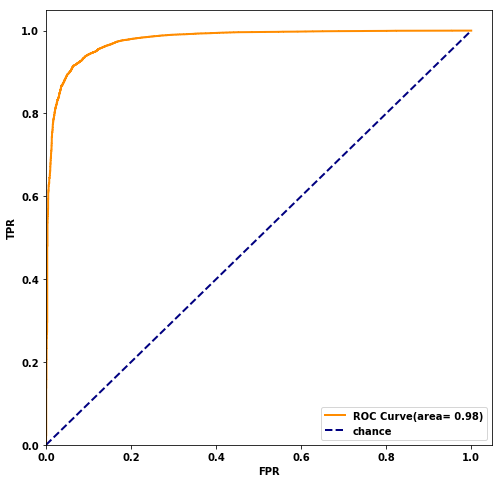

In [388]:
getROC(X_test, y_test,clf)

In [323]:
probs_ =  clf.predict_proba(X_test)
print(probs_)
y_score = clf.decision_function(X_test)
print(y_score)

[[0.02 0.98]
 [0.16 0.84]
 [0.05 0.95]
 ...
 [0.07 0.93]
 [0.03 0.97]
 [0.15 0.85]]
[4.14 1.67 2.88 ... 2.51 3.54 1.77]


In [324]:
fpr,tpr,threshold = roc_curve(y_test,y_score)

In [344]:
roc_auc = auc(fpr,tpr)
print(roc_auc)
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_score))

0.977514078233562
0.977514078233562


In [343]:
clf.scores_

{1: array([[0.64, 0.64, 0.64, 0.64],
        [0.95, 0.95, 0.95, 0.95],
        [0.97, 0.97, 0.97, 0.97],
        [0.98, 0.98, 0.98, 0.98],
        [0.97, 0.97, 0.97, 0.97]])}

### 贝叶斯

In [348]:
from sklearn.naive_bayes import MultinomialNB

In [425]:
mnb = MultinomialNB()
mnb.fit(X_train_std, y_train)

ValueError: Input X must be non-negative

In [354]:
# 归一化到0-1
from sklearn.preprocessing import MinMaxScaler

In [420]:
mm = MinMaxScaler()
mm.fit(X_train)
X_train_mm = mm.transform(X_train)

In [421]:
X_test_mm = mm.transform(X_test)

In [428]:
nb = MultinomialNB(alpha=0.01)
nb.fit(X_train_mm,y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [429]:
nb.score(X_test_mm, y_test)

0.9036241456550457

In [430]:
nb.score(X_train_mm,y_train)

0.9035648644509113

In [408]:
neg_mm = mm.transform(neg)

In [409]:
neg_mm

array([[0.45, 0.44, 0.36, ..., 0.45, 0.55, 0.56],
       [0.53, 0.45, 0.44, ..., 0.51, 0.64, 0.51],
       [0.51, 0.46, 0.37, ..., 0.54, 0.54, 0.45],
       ...,
       [0.47, 0.57, 0.41, ..., 0.52, 0.48, 0.41],
       [0.43, 0.54, 0.37, ..., 0.46, 0.51, 0.61],
       [0.48, 0.55, 0.34, ..., 0.61, 0.56, 0.62]])

In [410]:
nb.score(neg_mm,neg_y)

0.0

In [411]:
pos_mm = mm.transform(pos)

In [412]:
pos_mm

array([[0.5 , 0.44, 0.38, ..., 0.47, 0.53, 0.58],
       [0.5 , 0.44, 0.37, ..., 0.45, 0.54, 0.59],
       [0.44, 0.4 , 0.37, ..., 0.57, 0.7 , 0.6 ],
       ...,
       [0.49, 0.37, 0.36, ..., 0.4 , 0.55, 0.61],
       [0.61, 0.39, 0.42, ..., 0.49, 0.51, 0.59],
       [0.58, 0.26, 0.41, ..., 0.44, 0.67, 0.59]])

In [413]:
nb.score(pos_mm, pos_y)

1.0

In [427]:
nb.predict(pos_mm)

array([1, 1, 1, ..., 1, 1, 1])

### KNN

In [431]:
from sklearn.neighbors import KNeighborsClassifier

In [435]:
knn = KNeighborsClassifier(n_jobs = -1, n_neighbors=1 ,weights='distance')
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='distance')

In [437]:
knn.predict(X_test_std)

array([1, 1, 1, ..., 1, 1, 0])

In [438]:
knn.score(X_test_std,y_test)

0.9540807535466085

In [439]:
getResult(knn,X_train_std,X_test_std)

训练集的准确率:1.0，测试集的准确率：0.9540807535466085
评估部分：
所有非新华社的正确率：0.8441558441558441， 所有新华社的正确率：0.9963005809740532
训练集的混淆矩阵：
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      5037
          1       1.00      1.00      1.00     47195

avg / total       1.00      1.00      1.00     52232

测试集的混淆矩阵：
             precision    recall  f1-score   support

          0       0.88      0.61      0.72      3356
          1       0.96      0.99      0.97     31466

avg / total       0.95      0.95      0.95     34822



In [440]:
knn_mm = KNeighborsClassifier(n_jobs = -1, n_neighbors=1 ,weights='distance')
knn_mm.fit(X_train_mm,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='distance')

In [441]:
getResult(knn_mm,X_train_mm,X_test_mm,lx=0)

训练集的准确率:1.0，测试集的准确率：0.9544253632760898
评估部分：
所有非新华社的正确率：0.8464196354104611， 所有新华社的正确率：0.9962115915129479
训练集的混淆矩阵：
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      5037
          1       1.00      1.00      1.00     47195

avg / total       1.00      1.00      1.00     52232

测试集的混淆矩阵：
             precision    recall  f1-score   support

          0       0.87      0.62      0.72      3356
          1       0.96      0.99      0.98     31466

avg / total       0.95      0.95      0.95     34822



In [442]:
knn = KNeighborsClassifier(n_jobs = -1, n_neighbors=2 ,weights='distance')
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
           weights='distance')

In [443]:
getResult(knn,X_train_std,X_test_std)

训练集的准确率:1.0，测试集的准确率：0.9540807535466085
评估部分：
所有非新华社的正确率：0.8441558441558441， 所有新华社的正确率：0.9963005809740532
训练集的混淆矩阵：
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      5037
          1       1.00      1.00      1.00     47195

avg / total       1.00      1.00      1.00     52232

测试集的混淆矩阵：
             precision    recall  f1-score   support

          0       0.88      0.61      0.72      3356
          1       0.96      0.99      0.97     31466

avg / total       0.95      0.95      0.95     34822



### SVM